In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
import numpy as np

In [2]:
def before_oracle(circuit, n):
#   Ancilla qubit
    circuit.x(n)
    
    for qbit in range(n+1):    # +1 for ancilla qubit
        circuit.h(qbit)
        
    circuit.barrier()

In [25]:
def oracle(case, n):    
    circuit = QuantumCircuit(n+1)    # Do not add classical gates here. 
#   Gives the following error otherwise: 'Circuit with classical bits cannot be converted to gate.'    
    
    if case == 'constant' or 'c':
        dice = np.random.randint(2)    # Choose random number for 1: Constant-0 and 2: Constant-1
        if dice == 2:    # For dice == 1: Do nothing (Constant-0)
            circuit.x(2)    # check here!!

#     if case == 'balanced' or 'b':
    
    oracle_gate = circuit.to_gate()
    oracle_gate.name = 'Oracle'
        
    return oracle_gate

In [26]:
def after_oracle(circuit, n):
    for qbit in range(n):
        circuit.h(qbit)
    circuit.barrier()

In [27]:
def main(n):
    qc = QuantumCircuit(n+1, n)    # n+1 for ancilla qubit
    case = input('Choose the case: Constant or Balanced ')
    
#   Before Oracle
    before_oracle(qc, n)
    
#   Oracale
    oracle_gate = oracle(case, n)
    qc.append(oracle_gate, range(n+1))
    
#   After Oracle
    after_oracle(qc, n)
    
    qc.measure(range(n), range(n))
    
    display(qc.draw('mpl'))
    
    return qc

Enter the value of n: 5
Choose the case: Constant or Balanced c


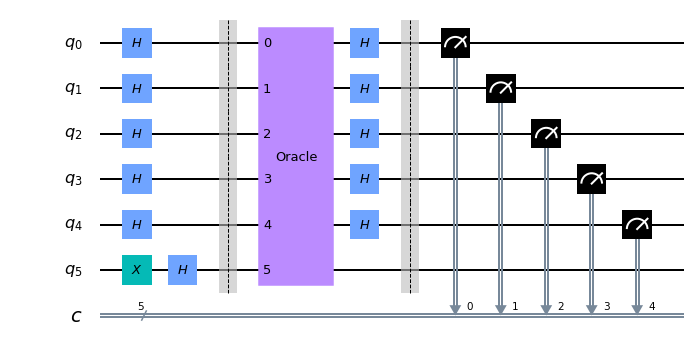

In [29]:
if __name__ == '__main__':
    n = int(input('Enter the value of n: '))
    circuit = main(n)

In [ ]:
backend = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend, shots = 1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)
# Outputs 0 for constant function and 1 for balanced function

In [ ]:
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
backend = provider.backends(simulator = False)
qcomp = least_busy(backend)
job = execute(circuit, qcomp)
print('Using the least busy device: ', qcomp.name())
job_monitor(job)

In [ ]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)